# Определение успешности игр для интернет-магазина

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Задачи исследования - выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Оглавление

[Шаг 1. Открытие файла с данными и изучение общей информации](#step1)

[Шаг 2. Подготовка данных](#step2)

[Шаг 3. Исследовательский анализ данных](#step3)

[Шаг 4. Составление портрета пользователя](#step4)

[Шаг 5. Проверка гипотез](#step5)

[Шаг 6. Общий вывод](#step6)

### Шаг 1. Открытие файла с данными и изучение общей информации <a name="step1"></a>

Для того, чтобы начать исследование, необходимо установить используемые в работе библиотеки, а также при необходимости обновить их:

In [1]:
#в ходе исследования возникла проблема в работе с библиотекой matplotlib - обновим версию
!pip install matplotlib -U --quiet 

In [2]:
#установим библиотеки, необходимые для исследования
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy import stats as st
import math
import seaborn as sns
import warnings
#устраним появляющиеся системные соообщения
warnings.filterwarnings('ignore')
#визуально выведем все колонки в таблице
pd.set_option('max_columns', None)

In [3]:
#прочтем файлы с исходным данными и запишем их в датафрейм
df = pd.read_csv('/datasets/games.csv')
#посмтрим на исходные данные
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на описание качественных и количественных показателей данных, а также на наличие пропусков в данных.

In [4]:
#информация о качественных показателях
df.info()
#информация о количественных показателях
display(df.describe())
#информация о наличии пропусков в данных
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод

Оценив визуально качественные характеристики исходных датасетов можно с уверенностью сказать, что необходима предварительная очистка и обработка данных для дальнейшего анализа.

Выявлены общие моменты, которые предстоит исправить для проведения дальнейшего анализа:

- перевести названия столбцов в нижний регистр;

- данные столбца *year_of_release* перевести в тип данных int64;

- данные столбца *user_score* перевести в тип данных float64.

Также проверить наличие и происходение пропусков в исходных данных.

### Шаг 2. Подготовка данных <a name="step2"></a>

На этапе визуальной оценки данных было выявлено наличие верхнего регистра в наименовании столбцов. Для снижения риска синтаксических ошибок и упрощения визуального восприятия необходимо преревести названия столбцов в нижний регистр.

In [5]:
#переведем названия столбцов в нижний регистр
df.columns = map(str.lower, df.columns)

Также было обнаружено наличие пропусков в данных - рассмотрим подробнее количество пропусков в каждом столбце и попробуем установить причины их происхождения.

In [6]:
#информация о наличии пропусков в данных
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Сразу стоит отметить малое количество пропусков в столбцах *name* и *genre*. В данном случае мы можем предположить, что пропуски возникли в результате ошибки выгрузки данных из открытых источников, также мы не имеем возможности объективно заменить чем-либо данные пропуски и ввиду их малого количества (2 штуки) можем безболезненно от них избавиться.

In [7]:
#удалим пустые строки по столбцам 'name' и 'genre' из датафрейма
df = df.dropna(subset=['name', 'genre'])
#посмотрим на результат удаления
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Мы избавились от неверно выгруженных данных. Однако в исходных данных еще много пропусков - в столбце *year_of_release* (год выпуска игры) обнаружено некоторое количество пропусков.

In [8]:
#посчитаем процент пропусков по столбцу 'year_of_release' от общего количества данных
print(len(df.query('year_of_release.isna()'))/len(df['year_of_release'])*100)
#выведем строки столбца 'year_of_release' с пропусками
display(df.query('year_of_release.isna()').head())

1.6095255190570215


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Пропуски по столбцу *year_of_release* составляют 1,6% от общего количества данных. Визуально изучив строки с пропусками, можем сказать, что они содержат много информации об остальных показателях и их удаление нецелесообразно и приведет к потере части данных. Однако мы можем попробовать произвести замену пропусков на медианные значения относительно игр выпущенных для определенных платформ. Для проверки распределения после замены на наличие отклонений после нее будем использовать диаграмму размаха. 

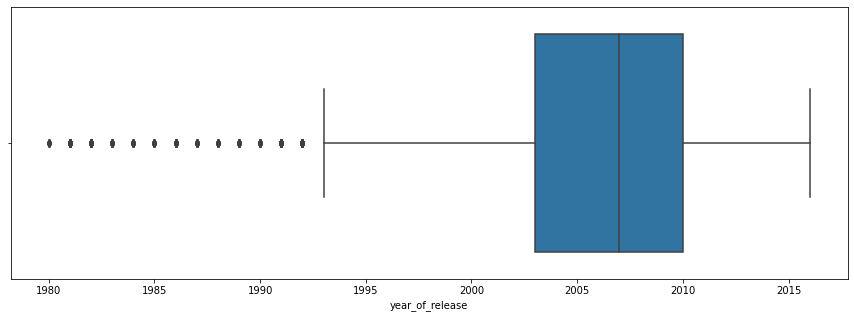

In [9]:
#построим диаграмму размаха для значений столбца 'year_of_release'
fig, ax = plt.subplots(figsize = (15,5))
ax = sns.boxplot(df.year_of_release)

Межквартильный размах составляет от 2004 до 2010 года. Соответсвенно возьмем значения данного диапазона для замены пропусков.

In [10]:
#заменим пропуски в столбце 'year_of_release' на медиану относительно платформ
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('platform')['year_of_release'].transform('median'))
#посмотрим на количество пропусков после замены
df['year_of_release'].isna().sum()

0

Замена прошла успешно. Проверим не изменили ли мы структуру и качество данных произведенной заменой.

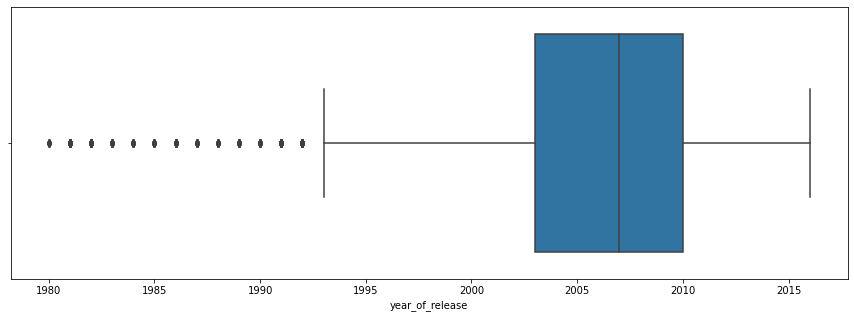

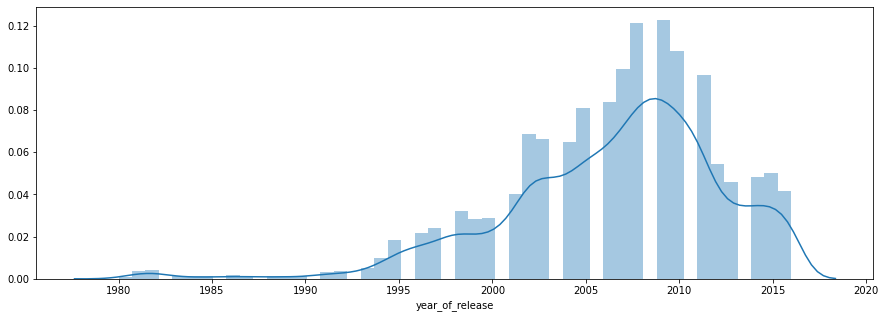

In [11]:
#построим диаграмму размаха для значений столбца 'year_of_release'
fig, ax = plt.subplots(figsize = (15,5))
ax = sns.boxplot(df.year_of_release)
plt.show()
#построим график распределения для значений столбца 'year_of_release'
fig, ax = plt.subplots(figsize = (15,5))
ax = sns.distplot(df.year_of_release)
plt.show()

Визуально можно сказать, что структура данных не поменяла своих значений - размах остался прежним. Можем предположить, что на это повлияло относительно небольшое количество пропусков и при наличии значимого объема пропусков данные могли бы исказиться. Однако по графику распределения можем судить, что распределения данных о годах выпуска игр - нормальное, что значит, что данные не потеряли своего качества.

Для дальнейшего удобства анализа приведем данные столбца *year_of_release* в тип int64.

In [12]:
#переведем тип данных столбца 'year_of_release' в тип int64
v

In [13]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Также были обнаружены пропуски в столбцах *critic_score* (оценка критиков), *user_score* (оценка пользователей) и *rating* (рейтинг от организации ESRB).

In [14]:
#посчитаем процент пропусков по столбцам от общего количества данных
print('Процент пропусков в столбце "critic_score":', len(df.query('critic_score.isna()'))/len(df['critic_score'])*100)
print('Процент пропусков в столбце "user_score":', len(df.query('user_score.isna()'))/len(df['user_score'])*100)
print('Процент пропусков в столбце "rating":', len(df.query('rating.isna()'))/len(df['rating'])*100)

Процент пропусков в столбце "critic_score": 51.313348890085564
Процент пропусков в столбце "user_score": 40.0825704541375
Процент пропусков в столбце "rating": 40.4714892598576


При оценке объема пропусков по столбцам, характеризующим рейтинг, можно сказать, что половина выпущенных игр не имеют оценки критиков, а также, пользовательских оценок на 10 процентов больше чем оценок критиков. Учитывая, что данные взяты из открытых источников, наличие пропусков не является чем-то невозможным в данном случае, скорей всего имеет место технические (не все разработчики игр просят оставить оценку или не всем играм требуется оценка критиков или рейтинг для выпуска на платформы) или психологические(не все пользователи готовы оставлять оценки используемым играм). 

Взглянем на корреляцию оценок критиков по доступным нам факторов.

In [15]:
#рассчет корреляции 
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.093252,0.004533,-0.165872,0.038140,0.010937
na_sales,-0.093252,1.000000,0.765341,0.449668,0.638695,0.240755
eu_sales,0.004533,0.765341,1.000000,0.435079,0.722796,0.220752
jp_sales,-0.165872,0.449668,0.435079,1.000000,0.291090,0.152593
other_sales,0.038140,0.638695,0.722796,0.291090,1.000000,0.198554
critic_score,0.010937,0.240755,0.220752,0.152593,0.198554,1.000000


Как мы видим оценки критиков слабо коррелируются от продаж и года выпуска игры. Можно предположить, что оценка будет зависеть от жанра игры, но здесь также необходимо учитывать и игровую платформу и регион пользователя. Это догадки. В любом случае объективной замены такому значительному объему пропущенных данных нет, поэтому проводить замену нецелосообразно ввиду сильно высокого риска искажения данных.

Ткаже при попытке замены типа данных был обнаружен странный объект в столбце *user_score* - "tbd". Посмотрим на его количество и оценим как его заменить.

In [16]:
#выберем строки с искомым значением
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Обнаружено 2424 строки со значением tbd. Как правило tbd это абривеатура от *To Be Determined( будет отпределено)* - соответвенно эти данные еще не определены и мы можем заменить их на пропуски и продолжить общую работу с данными и перевести их в пригодный для анализа тип.

In [17]:
#произведем замену значений  на NaN
df.loc[(df['user_score'] == "tbd"), 'user_score'] = np.nan
#переведем тип данных столбца 'user_score' в float64
df['user_score'] = df['user_score'].astype('float64')

Посмотрим на уникальные значения столбца рейтинга и при необходимости переименуем данные.

In [18]:
#уникальные значения столбца 'rating'
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Обнаружены двойные значения в столбце рейтинга - *E* и *K-A*. По утвержеднной аббривиатуре ассоциации, определяющей возрастной рейтинг компьютерных игр, - ESRB (Entertainment Software Rating Board) -«E» («Everyone») — «Для всех» первоначально была "K-A" ("Kids to Adults"). Соответсвенно данные значения нужно привести в актуальный вид.

In [19]:
#заменим значения на актуальные
df.loc[(df['rating'] == "K-A"), 'rating'] = 'E'

Также на данном этапе посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
#создадим столбец с суммарными продажами во всех регионах
df['all_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
#помотрим на данные
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

В ходе этапа "Подготовка данных" было проведено: 

- приведение столбцов в нижний регистр; 

- замена типа данных; 

- работа с пропущенными значениями в данных - поиск, определние причин возникновения и замена;

- обнаружение аномальных значений и их замена. 

Относительно ситуации с пропущенными значениями - вероятней всего предположить, что пропуски возникли в результате выгрузки данных из открытых источников, а также в результате технических (отсутвие необходимости предоставления данных пользователями - оценки) или психологических (нежелание пользователей оставлять данные - оценки).

### Шаг 3. Исследовательский анализ данных <a name="step3"></a>

На данном этапе нам предстоит разобраться в данных и ответить на вопросы:

- о количестве игр, выпущенных в разные года;

- изменении продаж по платформам;

- сроке "жизни" платформ;

- периоде данных для определения прогноза продаж на будущий период;

выявить лидеров среди платформ и жанров, а также оценить влияние оценок пользователей и критиков на продажи.

Изучим сколько игр выпускалось в разные годы и определим актуальный для анализа период.

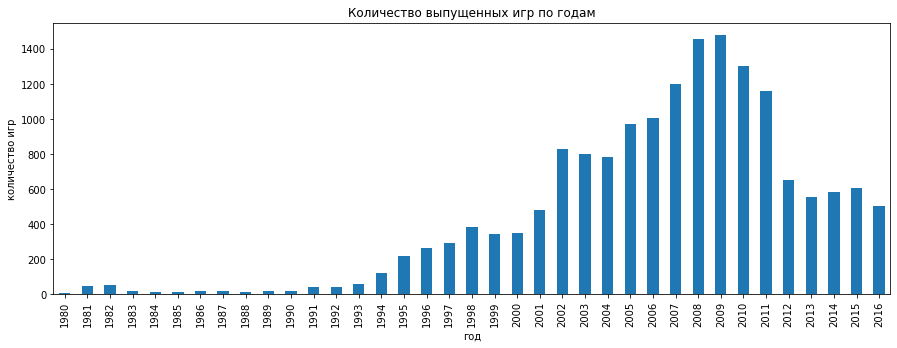

In [21]:
#построим график распределения количества выпущенных игр по годам
ax = df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize= (15, 5), title='Количество выпущенных игр по годам')
ax.set_xlabel('год')
ax.set_ylabel('количество игр')
plt.show()

На графике отчетливо видно,что в 2002 начался резкий подъем популярности выпуска новых игр - стали появляться и распространяться игровые платформы, их доступность и распространенность повышалась, пик популярности выпуска новых игр пришелся на 2008-2009 года, после этого тенденция выпуска новых игр пошла на спад.  На основании графика можем определить рабочий диапазон годов для построения прогноза - с 2006 по 2016 год (10 лет).

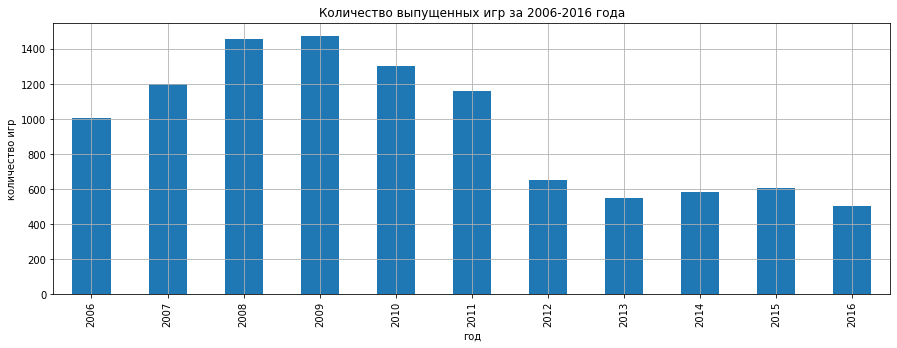

In [22]:
#создадим датафрейм с выбранным диапазоном годов
df_years = df.query('2006 <= year_of_release <=2016' )
#визуализируем данные по новому датафрейму
ax = df_years.groupby('year_of_release')['name'].count().plot(kind='bar', figsize= (15, 5), grid=True, title='Количество выпущенных игр за 2006-2016 года')
ax.set_xlabel('год')
ax.set_ylabel('количество игр')
plt.show()

Тенденция на выпуск около 500 новых игр в год сохраняется уже на протяжении порядка 5 лет.

Далее посмотрим, как менялись продажи по платформам по годам. 

Для этого создадим топ-5 платформ с наибольшими суммарными продажами и построим распределение годам.

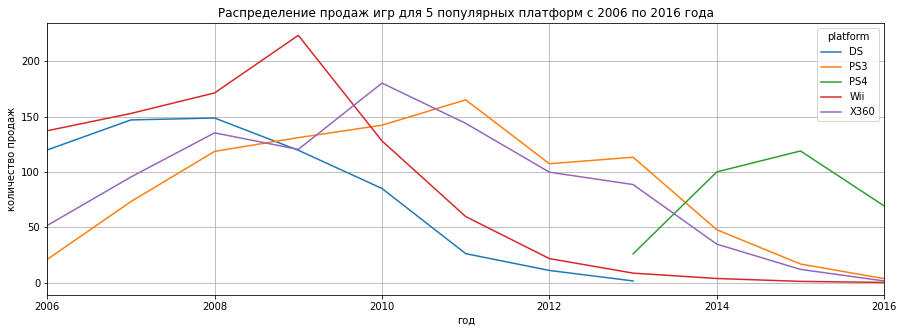

In [23]:
#создадим с помощью сводной таблицы топ-5 платформ по количеству продаж
top_5_price = df_years.pivot_table(index='platform', values='all_sales', aggfunc = 'sum').sort_values(by=['all_sales'], ascending=False).head()
#создадим сводную таблицу для выбора топ-5 платформ по количеству продаж
ax=df_years.query('platform in @top_5_price.index').pivot_table(index=['year_of_release'], columns=['platform'], values='all_sales', aggfunc = 'sum').plot(kind='line', figsize= (15, 5), grid=True, title='Распределение продаж игр для 5 популярных платформ с 2006 по 2016 года')
ax.set_xlabel('год')
ax.set_ylabel('количество продаж')
plt.show()

На графике отчетливо видны паттерны сроков появления новых и исчезновения старых платформ. В среднем **платформа живет 10 лет**, далее ее сменяет более новая версия или более конкурентный аналог. Своего **пик**а **популярности** платформа достигает как правило **на 4-5 год** жизни. Это можно объяснить тем, что чем старше платформа, тем больше игр на нее уже выпущено и продано, соответсвенно потенциала у новой платформы гораздо больше, не говоря уже о быстром повышении технического уровня новых платформ.

Однако для потроения прогноза на будущий период нам необходимо выбрать те популярные платформы, которые имеют данные о продажах на конец исследуюемого периода. Для этого нам необходимо уменьшить исследуемый период до 5ти крайних лет.

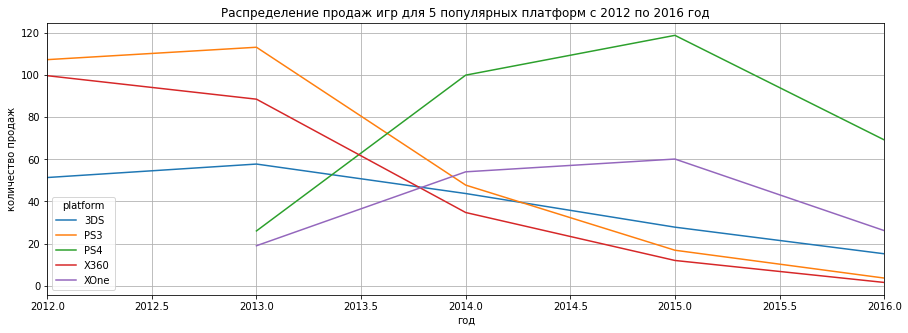

In [24]:
#создадим датафрейм с выбранным диапазоном годов
df_5_years = df.query('2012 <= year_of_release <=2016' )
#создадим с помощью сводной таблицы топ-5 платформ по количеству продаж
top_5_platform = df_5_years.pivot_table(index='platform', values='all_sales', aggfunc = 'sum').sort_values(by=['all_sales'], ascending=False).head()
#создадим сводную таблицу для выбора топ-5 платформ по количеству продаж
ax=df_5_years.query('platform in @top_5_platform.index').pivot_table(index=['year_of_release'], columns=['platform'], values='all_sales', aggfunc = 'sum').plot(kind='line', figsize= (15, 5), grid=True, title='Распределение продаж игр для 5 популярных платформ с 2012 по 2016 год')
ax.set_xlabel('год')
ax.set_ylabel('количество продаж')
plt.show()

Теперь мы видим только живые платформы. Можно увидеть что список платформ-лидеров заметно изменился. Отметим, что две самые топовые платормы - PS4 и XOne являются относительно молодыми платформами и, согласно нашему наблюдению о жизни и пике популярности платформ, как раз находятся находятся около пика своей популярности, хотя прослеживается общая тенденция платформ к снижению продаж, однако это может быть в виду неполных данных за 2016 год.

Посмотрим подробнее на платформы-лидеры по продажам и их тенденции - рост или падение. Построим график распределения продаж по платформам в выбранном диапазоне.

platform           3DS     PS3     PS4   X360   XOne
year_of_release                                     
2012             51.36  107.36     NaN  99.74    NaN
2013             57.76  113.25   25.99  88.58  18.96
2014             43.76   47.76  100.00  34.74  54.07
2015             27.78   16.82  118.90  11.96  60.14
2016             15.14    3.60   69.25   1.52  26.15


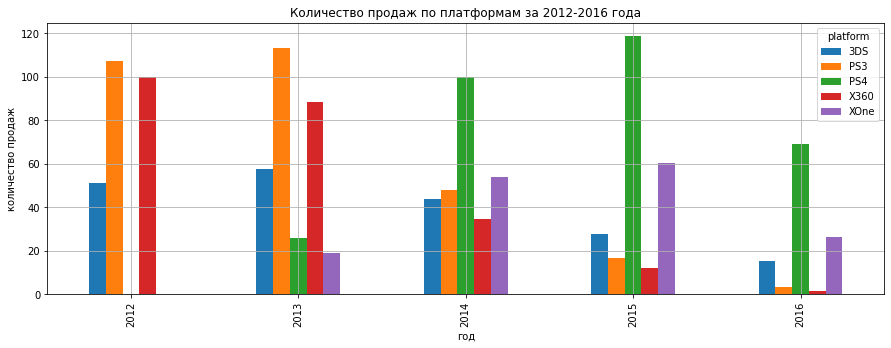

In [25]:
#создадим сводную таблицу продаж по платформам в заданном диапазоне лет
for_5_years = df_5_years.query('platform in @top_5_platform.index').pivot_table(index=['year_of_release'], columns=['platform'], values='all_sales', aggfunc = 'sum')
print(for_5_years)
ax=for_5_years.plot(kind='bar', figsize= (15, 5), grid=True, title='Количество продаж по платформам за 2012-2016 года')
ax.set_xlabel('год')
ax.set_ylabel('количество продаж')
plt.show()

Платформы на данном графике условно можно разделить на две группы, соответвующие двум противоположным тенденциям - старые платформы, которые переживают закономерное падение продаж, связанное с заключительным этапом своей жизни, так как они были заменены новыми платформами - PS3 заменила PS4, а X360 заменила XOne, и новые платформы, которые набирают свою популярность и станут основой для построения нашего прогноза. 

Среди перспективных платформ также есть конкуренция. Можно отметить, что **игры** выпущенные **для платформы PS4** в среднем имеют почти **в два раза больше продаж, чем игры** выпущенные **на XOne**. На это может влияеть множество факторов - начиная от разницы в технических возможностях платформ, заканчивая менталитеными особенностями потребителей.

Построим диаграммы размаха по глобальным продажам в разбивке по популярным платформам.

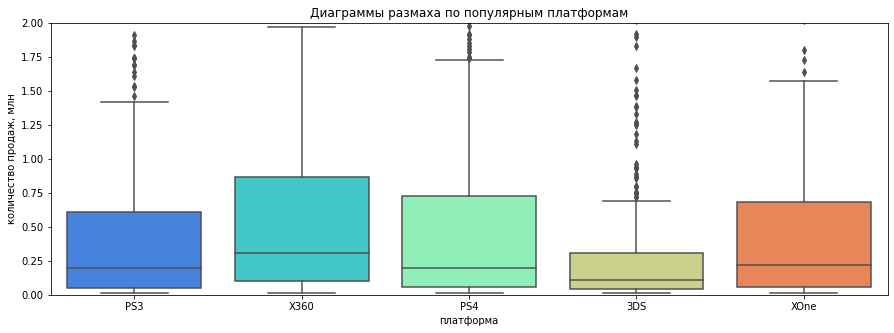

In [26]:
#создадим выборку по 5 популярным платформам
df_5_platform = df_5_years.query('platform in @top_5_platform.index')
#создадим диаграмму размаха 
fig, ax = plt.subplots(figsize = (15,5))
ax.set_ylim([0,2])
ax = sns.boxplot(x='platform', y='all_sales', data=df_5_platform, palette='rainbow')
ax.set_title('Диаграммы размаха по популярным платформам')
ax.set_xlabel('платформа')
ax.set_ylabel('количество продаж, млн')
plt.show()

Можно наблюдать, что в исследуемый для прогноза период (2012-2016 года) по популярным платформам четыре платформы X360, PS3, PS4 и XOne или две пары (старая и новая платформа) имеют схожую структуру продаж выпущенных для них игр, что говорит об однородности рынка их потребителей. 3DS имеет отличающуюся от остальных структуру, что показывает наличие других факторов, которые влияют на продажи игр, выпущенные для нее. 

Построим диаграммы размаха для всех платформ за весь период их существования.

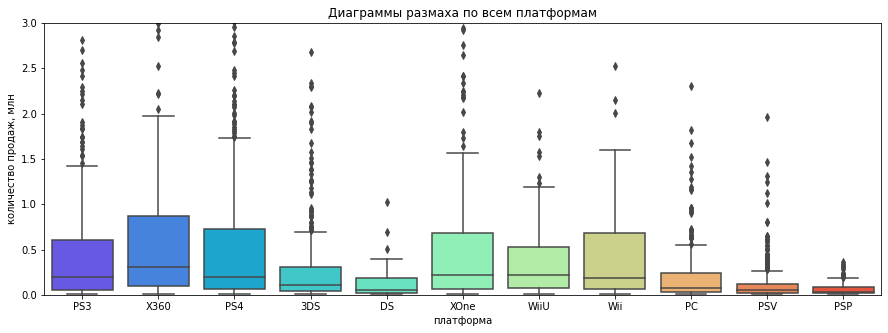

In [27]:
#создадим диаграмму размаха для всех платформ
fig, ax = plt.subplots(figsize = (15,5))
ax.set_ylim([0,3])
ax = sns.boxplot(x='platform', y='all_sales', data=df_5_years, palette='rainbow')
ax.set_title('Диаграммы размаха по всем платформам')
ax.set_xlabel('платформа')
ax.set_ylabel('количество продаж, млн')
plt.show()

По выбранному периоду можно наблюдать, что популярные в данный момент платформы действительно имеют большие размахи данных и более высокие продажи, чем их конкуренты.

Посмотрим как влияют на продажи внутри популярных платформ отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчититаем корреляцию между отзывами и продажами.


 PS3


,critic_score,user_score,all_sales
critic_score,1.000000,0.539456,0.331497
user_score,0.539456,1.000000,-0.005144
all_sales,0.331497,-0.005144,1.000000


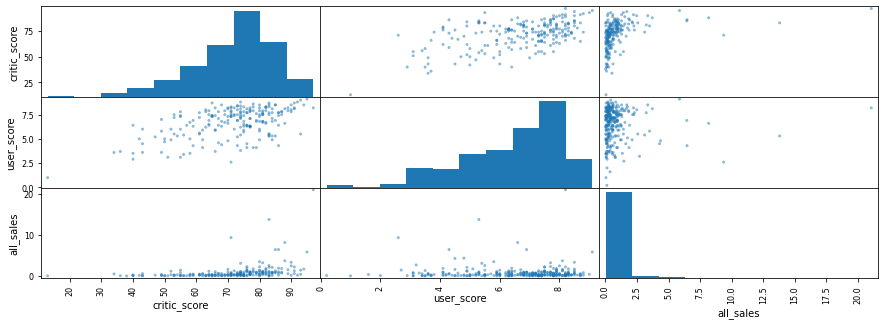


 X360


,critic_score,user_score,all_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
all_sales,0.360573,0.006164,1.000000


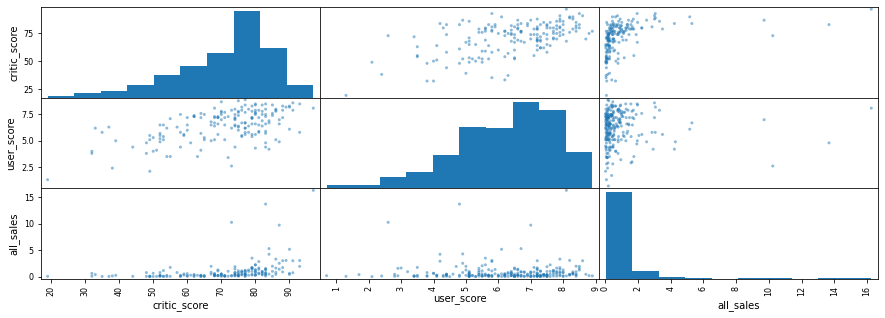


 PS4


,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
all_sales,0.406568,-0.031957,1.000000


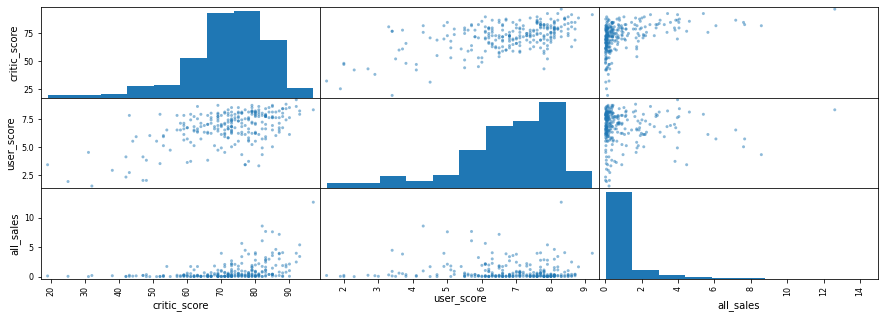


 3DS


,critic_score,user_score,all_sales
critic_score,1.000000,0.722184,0.323378
user_score,0.722184,1.000000,0.203735
all_sales,0.323378,0.203735,1.000000


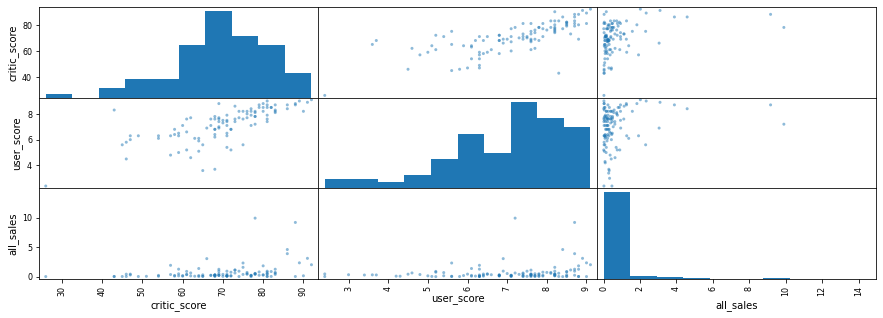


 XOne


,critic_score,user_score,all_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
all_sales,0.416998,-0.068925,1.000000


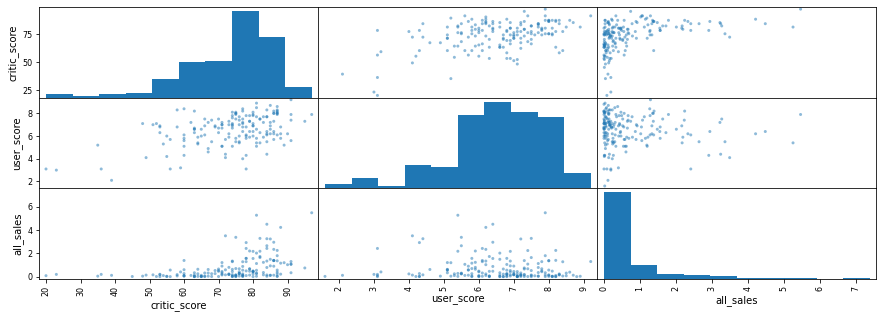

In [28]:
#создадим функцию для подсчета корреляции и построения диаграмм
def corr(df):
#составим датафрейм для матрицы
    platforms = df_5_platform['platform'].unique()
    for platform in platforms:
        print('\n', platform)
        df_1 = df.query('platform == @platform')
        df_2 = df_1[['platform','critic_score', 'user_score', 'all_sales']]
        #выведем матрицу корреляции
        display(df_2.corr())
        #построим матрицу диаграмм рассеяния
        pd.plotting.scatter_matrix(df_2, figsize=(15, 5))
        plt.show()
#вызовем функцию        
corr(df_5_years)

Продажи игр на платформы-лидеры PS4 и XOne не зависят от пользовательских оценок и напротив достаточно коррелируются с оценками критиков. В то время как продажи игр для популярных старых платформ имеют устоичивую зависимость как от оценок критиков так и пользователей. Сответвенно нельзя сказать, что продажи игр для новых платформ перестали зависеть от оценок пользователей. Предположительно такая зависимость возникла в результате относительно малого срока жизни новых платформ и недавнего выпуска игр для них, в отличие от старых платформ со старыми играми.

Посмотрим на общее распределение игр по жанрам и выделим самые прибыльные из них, а также сравним жанры с высокими и низкими продажами.

Топ 5 жанров по количеству выпускаемых игр: genre
Action          1032
Role-Playing     372
Adventure        303
Sports           269
Shooter          236
Name: genre, dtype: int64
Топ 5 жанров по количеству проданных игр: genre
Action          441.52
Shooter         304.80
Role-Playing    193.09
Sports          181.09
Misc             85.04
Name: all_sales, dtype: float64


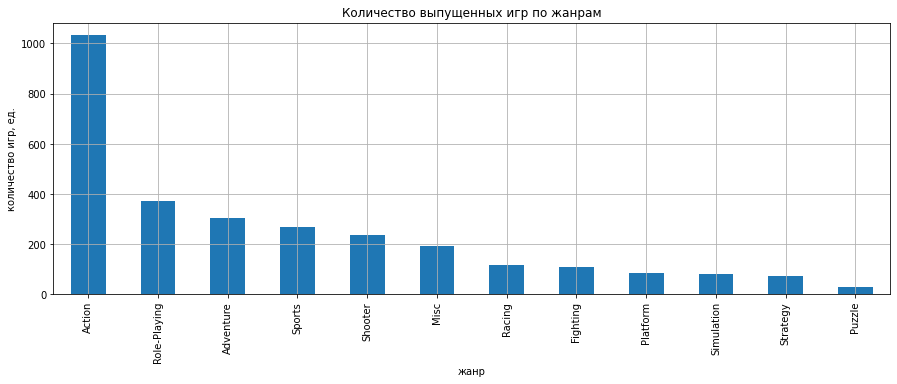

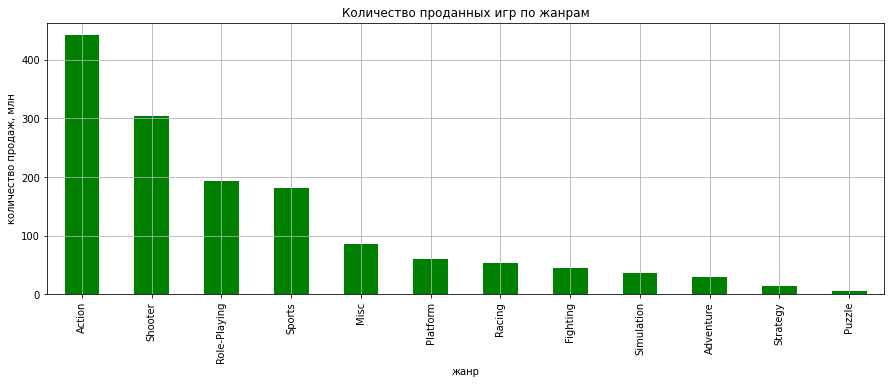

In [29]:
#сгруппируем значения по количеству выпущенных игр и сумме продаж по жанрам
count_genre = df_5_years.groupby('genre')['genre'].count().sort_values(ascending=False)
sum_genre = df_5_years.groupby('genre')['all_sales'].sum().sort_values(ascending=False)
# выведем основную информацию о количестве выпущенных игр и сумме продаж в разрезе жанров
print('Топ 5 жанров по количеству выпускаемых игр:', count_genre.head())
print('Топ 5 жанров по количеству проданных игр:', sum_genre.head())
#визуализируем полученную информацию
ax=count_genre.plot(kind='bar', figsize = (15,5), grid=True, title='Количество выпущенных игр по жанрам')
ax.set_xlabel('жанр')
ax.set_ylabel('количество игр, ед.')
plt.show()
ax=sum_genre.plot(kind='bar', figsize = (15,5), color='g', grid=True, title='Количество проданных игр по жанрам')
ax.set_xlabel('жанр')
ax.set_ylabel('количество продаж, млн')
plt.show()

Можно отметить, что список 5ти популярных жанров по количеству выпущенных игр и список 5ти популярных жанров по количеству продаж довольно схожи. **Больше всего игр выпускается и продается в жанре **Action**. Далее почти в кратный разрыв в топе жанров по количеству выпущенных игр идут Role-Playing, Adventure и Sports. Однако по количеству продаж второе место занимает жанр Shooter, хотя по количеству выпущенных игр он находится на краю 5ки топовых жанров.

Примечательно, что пользователям нравятся жанры активных действий и первые 5ть популярных жанров как раз ими наполнены. Логично было бы предположить, что жанр Adventure мог бы приблизиться по продажам к самым популярным жанрам, однако данные показывают обратное - при оносительно большом количестве выпуска игр данного жанра, его продажи занимают третье место с конца списка, также как и стратегии. Предположительно данный факт возник в результате различий в пользовательских предпочтениях - большинство предпочитают быстрые и активные дейстия, медленным и вдумчивым размышлениям.

### Вывод

В ходе этапа "Исследовательский анализ данных" было выявлено, что:

- пик популярности выпуска игр пришелся на 2008-2009 года;

- в среднем срок жизни **платформы** составляе **10 лет**, далее ее сменяет более новая версия или более конкурентный аналог. Своего **пик**а **популярности** платформа достигает как правило **на 4-5 год** жизни;

- две самые топовые платормы - PS4 и XOne являются относительно молодыми платформами и, согласно нашему наблюдению о жизни и пике популярности платформ, как раз находятся находятся около пика своей популярности;

- **игры** выпущенные **для платформы PS4** в среднем имеют почти **в два раза больше продаж, чем игры** выпущенные **на XOne**. На это может влиять множество факторов - начиная от разницы в технических возможностях платформ, заканчивая менталитеными особенностями потребителей;

- продажи игр на платформы-лидеры PS4 и XOne не зависят от пользовательских оценок и напротив достаточно коррелируются с оценками критиков.Предположительно такая зависимость возникла в результате относительно малого срока жизни новых платформ и недавнего выпуска игр для них.

- **больше всего игр выпускается и продается в жанрах Action и Sports**

### Шаг 4. Составление портрета пользователя <a name="step4"></a>

На данном этапе анализа определим для пользователя каждого региона (NA, EU, JP) топ самых популярных платформ и самых популярных жанров. А также посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Выявим и сравним самые популярные платформы по регионам пользователей, для этого создадим для каждого региона сводные таблицы для продаж по платформам и на их основе визуализируем сравнения. Обязательно сделаем это в рамках периода для построения прогноза, иначе мы рискуем исследовать неактуальные и уже неиспользуемые платформы.

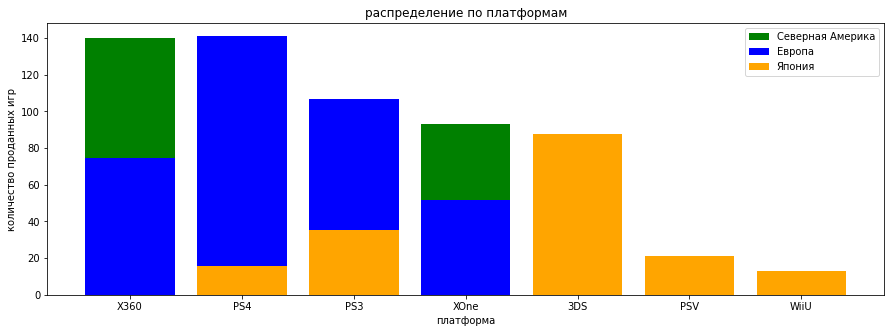

In [30]:
#создадим сводные таблицы для продаж по платформам в каждом регионе
top_5_na = df_5_years.query('2012 <= year_of_release <=2016' ).pivot_table(index='platform', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head()
top_5_eu = df_5_years.query('2012 <= year_of_release <=2016' ).pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head()
top_5_jp = df_5_years.query('2012 <= year_of_release <=2016' ).pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head()
#визуализируем данные 
fig, ax = plt.subplots()

ax.bar(top_5_na.index, top_5_na['na_sales'], color='g')
ax.bar(top_5_eu.index, top_5_eu['eu_sales'], color='b')
ax.bar(top_5_jp.index, top_5_jp['jp_sales'], color='orange')

fig.set_figwidth(15)
fig.set_figheight(5)
ax.set_title('распределение по платформам')
ax.set_ylabel('количество проданных игр')
ax.set_xlabel('платформа')
ax.legend(['Северная Америка', 'Европа', 'Япония'])
plt.show()

Американцы предпочитают играть на платформах Microsoft - X360 и XOne, они превышают пользователей других регионов на этих платформах в два раза.

Однако Microsoft так и не смог завоевать доверие японцев и японских производителей игр. Японцы не играют на платформах X360 и XOne по причинам особенностей внутреннего менталитета - предпочитают приватность, заверенное качество и локальность производства. Им это предоставляют  в некоторой степени платформы PS и в полной мере Nintendo.

Европейцы отдают предпочтения международноизвестным платформам и не делят на страны производители. Наибольшей популярностью пользуются игры, вышедшие для платформы PS4.

Определим самые популярные жанры по регионам пользователей, для этого также создадим для каждого региона сводные таблицы для продаж по жанрам и на их основе визуализируем сравнения.

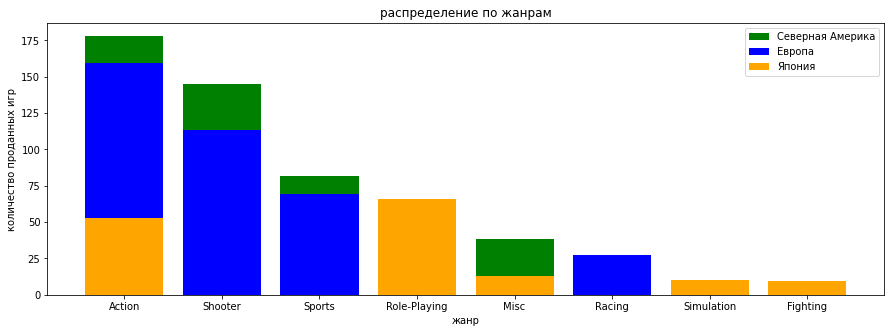

In [31]:
#создадим сводные таблицы для продаж по жанрам в каждом регионе
genre_5_na = df_5_years.pivot_table(index='genre', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head()
genre_5_eu = df_5_years.pivot_table(index='genre', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head()
genre_5_jp = df_5_years.pivot_table(index='genre', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head()
#визуализируем данные 
fig, ax = plt.subplots()

ax.bar(genre_5_na.index, genre_5_na['na_sales'], color='g')
ax.bar(genre_5_eu.index, genre_5_eu['eu_sales'], color='b')
ax.bar(genre_5_jp.index, genre_5_jp['jp_sales'], color='orange')

fig.set_figwidth(15)
fig.set_figheight(5)
ax.set_title('распределение по жанрам')
ax.set_ylabel('количество проданных игр')
ax.set_xlabel('жанр')
ax.legend(['Северная Америка', 'Европа', 'Япония'])
plt.show()

Американцы больше всех фанатеют от жанра Action, Shooter и Sports, также предпочитают разносторонний жанр Misc наравне с японцами. 

Пользователи из Европы прирожденные игроки-гонщики, за последние пять лет аналоги NFC уходили именно в этот регион. Однако Action, Shooter и Sports они предпочитают больше.

Role-Playing, Simulation и Fighting предпочтение пользователей из Японии.

Международным и мультирегиональным жанром можно признать Action - самый выпускаемый жанр игр также лидирует по суммарным продажам в мире и представлен во всех пользовательских регионах.

Далее попробуем оценить влияние рейтинга ESRB на продажи в отдельных регионах, для этого также создадим для каждого региона сводные таблицы для продаж по рейтингу и на их основе визуализируем сравнения.

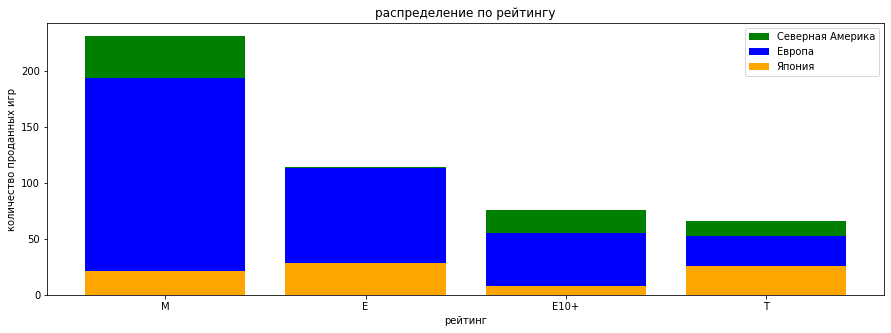

In [32]:
#создадим сводные таблицы для продаж по рейтингу в каждом регионе
rating_na = df_5_years.pivot_table(index='rating', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head()
rating_eu = df_5_years.pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head()
rating_jp = df_5_years.pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head()
#визуализируем данные 
fig, ax = plt.subplots()

ax.bar(rating_na.index, rating_na['na_sales'], color='g')
ax.bar(rating_eu.index, rating_eu['eu_sales'], color='b')
ax.bar(rating_jp.index, rating_jp['jp_sales'], color='orange')

fig.set_figwidth(15)
fig.set_figheight(5)
ax.set_title('распределение по рейтингу')
ax.set_ylabel('количество проданных игр')
ax.set_xlabel('рейтинг')
ax.legend(['Северная Америка', 'Европа', 'Япония'])
plt.show()

По всем показателям в Северной Америке и Европе большей популярностью пользуются игры с рейтингом «M» («Mature») — «Для взрослых», в то время как в Японии одинаково популярны игры «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам».

### Вывод

На этапе "Составление портрета пользователя" были определены для пользователя каждого региона (NA, EU, JP) топ самых популярных платформ, жанров и возрастных рейтингов. 

Если собрать воедино портрет пользователя для каждого региона, то получится, что идеальной игрой для:

- пользователя из **Северной Америки** будет игра с возрастным рейтингом «Для взрослых» жанра Action, выпущенная для платформ Microsoft - X360 и XOne;

- пользователя из **Европы** - игра с возрастным рейтингом «Для взрослых» жанра Action, выпущенная для платформы PS4;

- пользователя из **Японии** - игра с возрастным рейтингом «Для всех» или «Подросткам» жанра Role-Playing, выпущенная для платформ Nintendo.

В любом случае приверженность определенным платформам, жанрам или возрастным ограничением четко зависит от менталитета и регионального предпочтения пользователя.

### Шаг 5. Проверка гипотез <a name="step5"></a>

На данном этапе анализа проведем исследование нескольких гипотез и ответим на вопросы: отличаются ли средние пользовательские рейтинги платформ Xbox One и PC, а также средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»). Для это поочереди проверим гипотезы и сформулируем выводы.

**Гипотеза 1** 

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Нулевая гипотеза** - средние пользовательские рейтинги платформ Xbox One и PC не различается, т.е. одинакова.

**Альтернативная гипотеза** - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC.

Сначала создадим выборки по принадлежности к платформе.

In [33]:
#предварительно очистим столбец пользовательских оценок от пропусков
df_clear = df_5_years.dropna(subset=['user_score'])
#создадим выборки 
df_xbox = df_clear.query('platform == "XOne"').reset_index(drop=True)
df_pc = df_clear.query('platform == "PC"').reset_index(drop=True)

Cравним дисперсии выборок, чтобы принять решение об их равенстве или неравенстве для выбора параметра equal_var (равенства дисперсий выборок).

In [34]:
#создадим условия для сравнения дисперсий выборок
if (np.var(df_xbox['user_score']).round(1) == np.var(df_pc['user_score']).round(1)):
    print('Дисперсии равны, необходимо использовать equal_var = True')
else:
    print('Дисперсии не равны, необходимо использовать equal_var = False')

Дисперсии не равны, необходимо использовать equal_var = False


Для проверки данной гипотезы равенства двух независимых совокупностей используем метод scipy.stats.ttest_ind - статистический критерий Стьюдента, потому что данные представляют собой независимые друг от друга выборки. На основании сравнения дисперсий выборок параметр **equal_var** зададим **False**, потому что дисперсии выборок не равны. Критический уровень статистической значимости обозначим в 1%.

In [35]:
#задаем критический уровень статистической значимости
alpha = 0.01
#проведем анализ с помощью метода st.ttest_ind
results = st.ttest_ind(df_xbox['user_score'], df_pc['user_score'], equal_var = False)
#выведем полученное значение
print('p-значение: ', results.pvalue)
#сравним полученное значение с заданным уровнем значимости и выведем результат
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Соответсвенно полученному значению можно сказать, что мы не можем отвергнуть нулевую гипотезу и средний пользовательский рейтинг платформы Xbox One не отличается от среднего пользовательского рейтинга платформы PC.

**Гипотеза 2** 

- средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза** - средний пользовательский рейтинг жанра Action не отличается от средниго пользовательского рейтинга жанра Sports, т.е. они одинаковы.

**Альтернативная гипотеза** - средние пользовательские рейтинги жанров Action и Sports разные.

Сначала создадим выборки по принадлежности к жанру.

In [36]:
#создадим выброрки 
df_sports = df_clear.query('genre == "Sports"').reset_index(drop=True)
df_action = df_clear.query('genre == "Action"').reset_index(drop=True)

Cравним дисперсии выборок, чтобы принять решение об их равенстве или неравенстве для выбора параметра equal_var (равенства дисперсий выборок).

In [37]:
#создадим условия для сравнения дисперсий выборок
if (np.var(df_sports['user_score']).round(1) == np.var(df_action['user_score']).round(1)):
    print('Дисперсии равны, необходимо использовать equal_var = True')
else:
    print('Дисперсии не равны, необходимо использовать equal_var = False')

Дисперсии не равны, необходимо использовать equal_var = False


Для проверки данной гипотезы равенства двух независимых совокупностей используем метод scipy.stats.ttest_ind - статистический критерий Стьюдента, потому что данные представляют собой независимые друг от друга выборки. На основании сравнения дисперсий выборок параметр **equal_var** зададим **False**, потому что дисперсии выборок не равны. Критический уровень статистической значимости обозначим в 1%.

In [38]:
#задаем критический уровень статистической значимости
alpha = 0.01
#проведем анализ с помощью метода st.ttest_ind
results = st.ttest_ind(df_sports['user_score'], df_action['user_score'], equal_var = False)
#выведем полученное значение
print('p-значение: ', results.pvalue)
#сравним полученное значение с заданным уровнем значимости и выведем результат
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  4.305337670692197e-20
Отвергаем нулевую гипотезу


На основании теста мы можем отвергнуть нулевую гипотезу, что говорит различии пользовательских рейтингов для жанров Action и Sports. 

Попробуем посмотреть насколько различаются рейтинги для этих двух жанров.

In [39]:
#создадим переменные для расчета среднего рейтинга
mean_score_action = df_action['user_score'].mean().round(2)
mean_score_sports = df_sports['user_score'].mean().round(2)
#выведем показатели среднего рейтинга и их отношения
print('Средний пользовательский рейтинг жанра Action:', mean_score_action)
print('Средний пользовательский рейтинг жанра Sports:', mean_score_sports)
print('Средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports на', (mean_score_action-mean_score_sports).round(1))


Средний пользовательский рейтинг жанра Action: 6.82
Средний пользовательский рейтинг жанра Sports: 5.46
Средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports на 1.4


На основании анализа можно однозначно сказать, что средний пользовательский **жанра Action больше** среднего пользовательского **рейтинга жанра Sports на 1.4** пункта.

### Вывод

На этапе "Проверка гипотез" мы обнаружили, что:

- средний пользовательский рейтинг платформы PC не отличается от среднего пользовательского рейтинга платформы Xbox One;

- средний пользовательский **рейтинг жанра Action больше** среднего пользовательского **рейтинга жанра Sports на 1.4** пункта.

### Шаг 6. Общий вывод <a name="step6"></a>

В начале исследования перед нами стояла задача выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на будущий период.

При оценке данных было выявлено, что имеются отклонения и их необходимо предварительно обработать для дальнейшего анализа.

В ходе работы была произведена замена типа данных, работа с названиями столбцов, обработка и выявление причин возникновения пропущенных значений. Посчитаны суммарные продажи по каждой выпущенной игре.

В ходе исследовательского анализа, составления портрета пользователя и проверки гипотез были выявлены основные закономерности, определяющие успешность игр, которые прямым образом влияют на объем продаж:

- этап жизненного цикла платформы для которой выпускаются игры - новая платформа, находится на пике популярности или переживает заключительный этап падения продаж;

- самыми популярными платформами в мире на конец исследуемого периода являются PS4 и XOne;

- больше всего игр выпускается и продается в жанре Action, однако в последние годы набирает популярность жанр Shooter;

- оценки критиков и пользователей незначительно влияют на продажи игр;

- региональная принадлежность пользователя и соответсвенно особенности его предпочтений платформы, жанра и рейтинга в значительной степени влияют на продажи.

На основании проведенного исследования можно заключить, что на будущий период интернет-магазину «Стримчик» необходимо планировать рекламную компанию с учетом региональных предпочтений, руководствуясь составленными портретами пользователей по популярным продуктам:

- для рынка Северной Америки необходимо выбирать игры преимущественно с возрастным рейтингом «M», жанров Action, Shooter и Sports, выпущенные под платформы Microsoft;

- для рынка Европы необходимо выбирать игры преимущественно с возрастным рейтингом «M», жанров Action, Shooter, Sports и Racing, выпущенные на платформы PS4 или XOne;

- для рынка Японии необходимо выбирать игры преимущественно с возрастным рейтингом «E» или «T», жанров Action, Role-Playing, Simulation и Fighting, выпущенные под платформы PS или Nintendo.